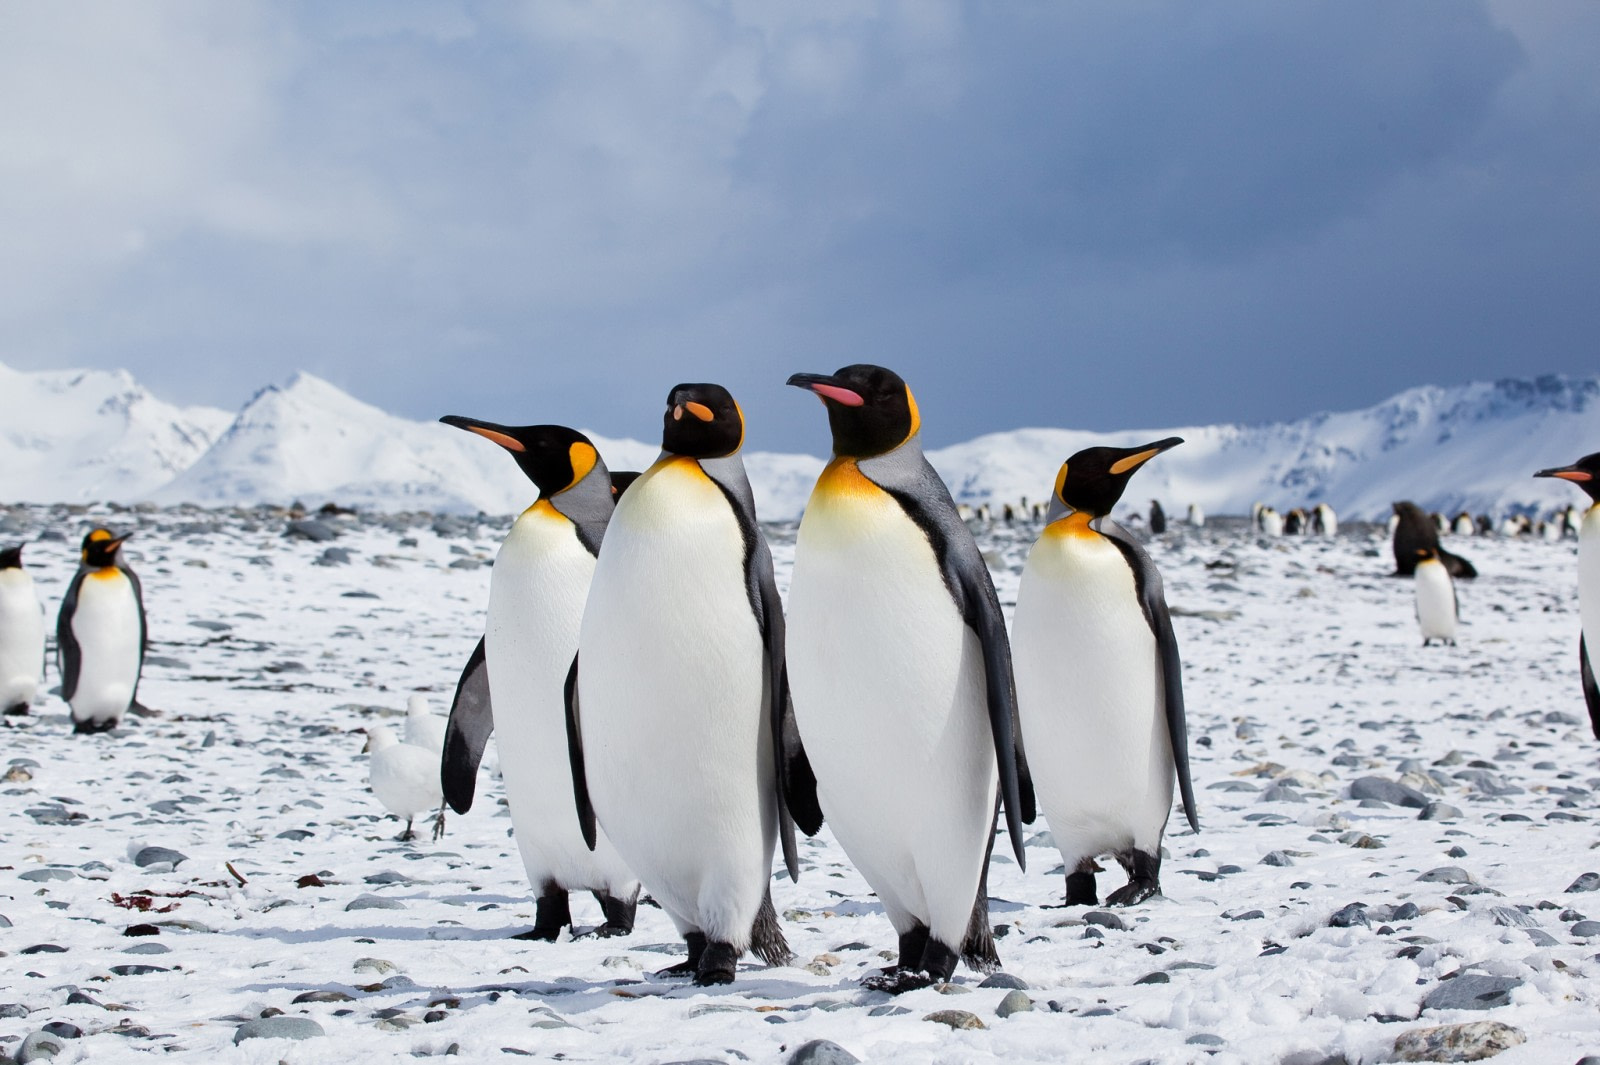

# Capstone Project: Penguins

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 4-7, 2023**

Garrett Becker

____
____
## Part 1: Exploration
____
____

____
## Import and Initial Investigation
____

** Import modules **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import chart_studio.plotly as py

** Import data **

In [2]:
df = pd.read_csv('penguins.csv')

** Check dataframe info **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


** Check the head and tail **

In [4]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


** Print out basic stats **

In [6]:
df.drop('year', axis=1).describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386
std,99.448479,5.459584,1.974793,14.061714,801.954536
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000


____
## Data Cleaning
____

** Add in latitude and longitude for islands **

In [7]:
# latitude column
# conditions list
lat_conditions = [
    (df['island'] == 'Biscoe'),
    (df['island'] == 'Dream'),
    (df['island'] == 'Torgersen')
]

# create a list of the values we want to assign for each condition
lat_values = [-65.7474, -64.7333, -64.7667]

# create a new column and use np.select to assign values to it using our lists as arguments
df['latitude'] = np.select(lat_conditions, lat_values)

# longitude column
# conditions list
lat_conditions = [
    (df['island'] == 'Biscoe'),
    (df['island'] == 'Dream'),
    (df['island'] == 'Torgersen')
]

# create a list of the values we want to assign for each condition
lat_values = [-65.9164, -64.2333, -64.0833]

# create a new column and use np.select to assign values to it using our lists as arguments
df['longitude'] = np.select(lat_conditions, lat_values)

# check the head to see new columns
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,latitude,longitude
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,-64.7667,-64.0833
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,-64.7667,-64.0833
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,-64.7667,-64.0833
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,-64.7667,-64.0833
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-64.7667,-64.0833


** Dig into NaN values - which rows have an NaN? **

In [8]:
df[df.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,latitude,longitude
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,-64.7667,-64.0833
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007,-64.7667,-64.0833
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007,-64.7667,-64.0833
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007,-64.7667,-64.0833
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007,-64.7667,-64.0833
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007,-64.7333,-64.2333
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007,-65.7474,-65.9164
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008,-65.7474,-65.9164
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009,-65.7474,-65.9164
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009,-65.7474,-65.9164


** Fill in the average of numerical columns for NaN, and ignore the sex column for now **

In [9]:
df['bill_length_mm'].fillna(value=df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(value=df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(value=df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(value=df['body_mass_g'].mean(), inplace=True)

In [10]:
df[df.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,latitude,longitude
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007,-64.7667,-64.0833
8,9,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN,2007,-64.7667,-64.0833
9,10,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN,2007,-64.7667,-64.0833
10,11,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN,2007,-64.7667,-64.0833
11,12,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN,2007,-64.7667,-64.0833
47,48,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN,2007,-64.7333,-64.2333
178,179,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN,2007,-65.7474,-65.9164
218,219,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN,2008,-65.7474,-65.9164
256,257,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN,2009,-65.7474,-65.9164
268,269,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN,2009,-65.7474,-65.9164


** Take out the NaN sex values when doing machine learning ** 

____
## Basic Questions
____

** How many species and islands are included in the data? How many records for each? **

In [11]:
df['species'].nunique()

3

In [12]:
df['species'].value_counts().to_frame()

,species
Adelie,152
Gentoo,124
Chinstrap,68


In [13]:
df['island'].nunique()

3

In [14]:
df['island'].value_counts().to_frame()

,island
Biscoe,168
Dream,124
Torgersen,52


** Get averages based on species and islands **

In [15]:
df_species_averages = df.drop('year', axis=1).groupby('species').mean()
df_species_averages.reset_index(drop=False, inplace=True)
df_species_averages.head()

,species,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,latitude,longitude
0,Adelie,76.5,38.825144,18.338495,190.025758,3703.958910,-65.038282,-64.669197
1,Chinstrap,310.5,48.833824,18.420588,195.823529,3733.088235,-64.733300,-64.233300
2,Gentoo,214.5,47.475983,14.999606,217.055768,5068.965761,-65.747400,-65.916400


In [16]:
df_island_averages = df.drop('year', axis=1).groupby('island').mean()
df_island_averages.reset_index(drop=False, inplace=True)
df_island_averages.head()

,island,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,latitude,longitude
0,Biscoe,176.547619,45.249535,15.882447,209.654257,4712.956871,-65.7474,-65.9164
1,Dream,211.725806,44.167742,18.344355,193.072581,3712.903226,-64.7333,-64.2333
2,Torgersen,65.884615,39.046576,18.404830,191.382985,3715.899123,-64.7667,-64.0833


____
## Visualizations
____

** Count plots for Species and Islands, individual and over time **

<AxesSubplot:xlabel='species', ylabel='count'>

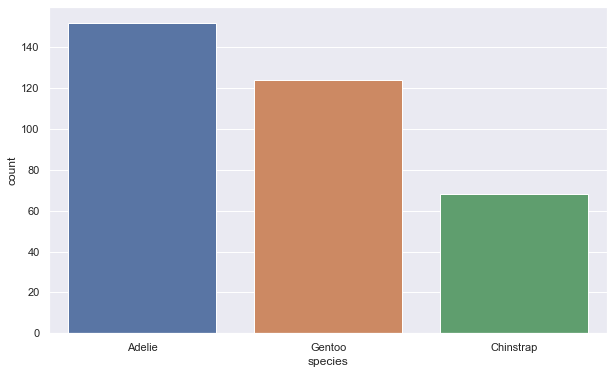

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='species', data=df)

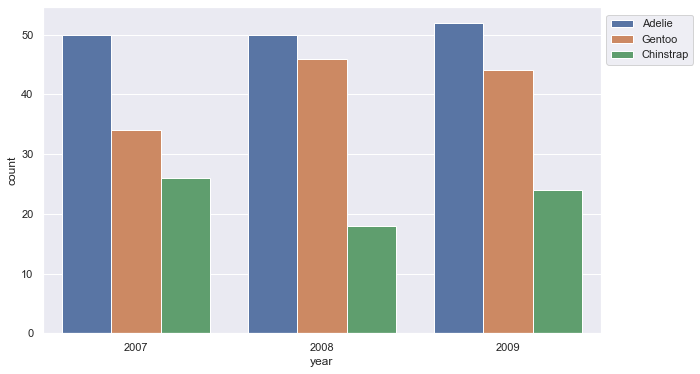

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='year', data=df, hue='species')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
plt.show()

<AxesSubplot:xlabel='island', ylabel='count'>

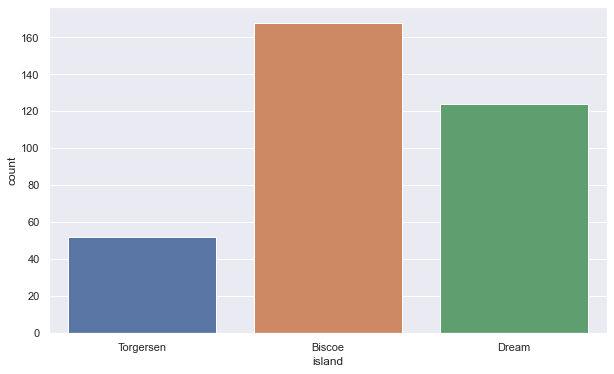

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='island', data=df)

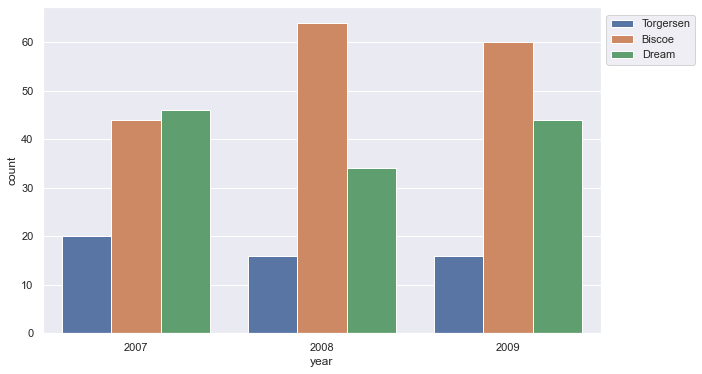

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='year', data=df, hue='island')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
plt.show()

** Numerical Values Pairplot **

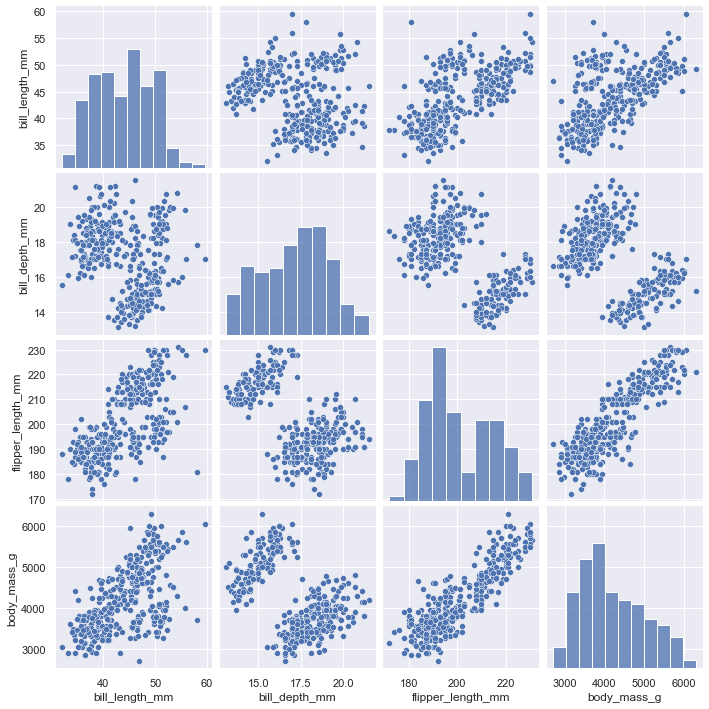

In [21]:
sns.pairplot(df.drop(['Unnamed: 0', 'year', 'latitude', 'longitude'], axis=1))

** Jointplots to show possible correlations **

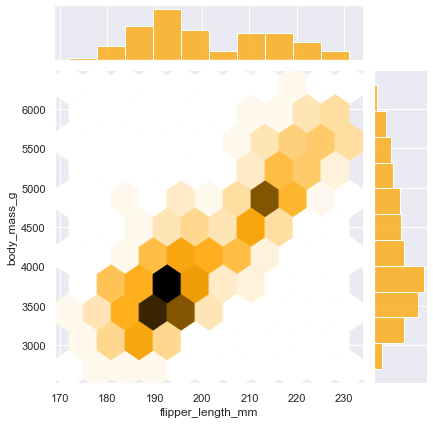

In [22]:
sns.jointplot(x=df['flipper_length_mm'], y=df['body_mass_g'], color='orange', kind='hex')

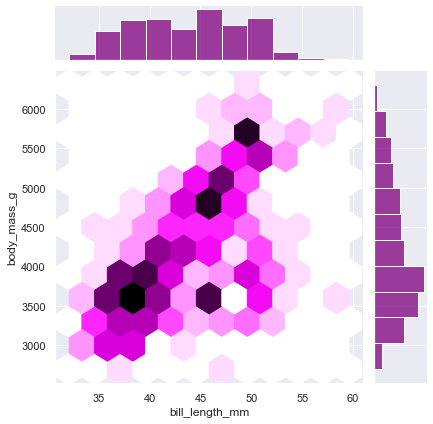

In [23]:
sns.jointplot(x=df['bill_length_mm'], y=df['body_mass_g'], color='purple', kind='hex')

** Flipper Length vs Body Mass trends per species by island **

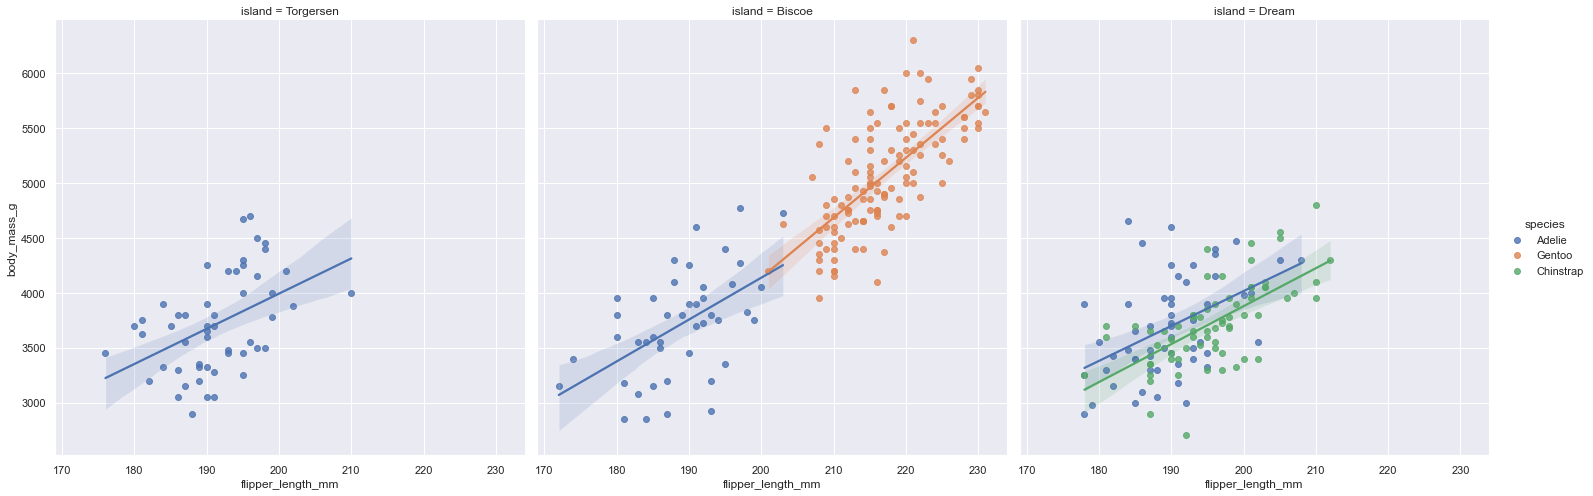

In [26]:
sns.lmplot(
    data=df, x='flipper_length_mm', y='body_mass_g',
    hue='species', col='island', height=7,
)

** Map: Average Bill Lengths by Island **

In [27]:
color_scale = [(0, 'green'), (1,'yellow')]

fig = px.scatter_mapbox(
    df_island_averages, 
    title='Average Bill Lengths by Island',
    lat='latitude', 
    lon='longitude', 
    hover_name='island', 
    hover_data=['island', 'bill_length_mm'],
    color='bill_length_mm',
    color_continuous_scale=color_scale,
    size='bill_length_mm',
    zoom=6.5, 
    height=600
)

fig.update_layout(
    title_x=0.3,
    title_y=0.95,
    mapbox_style="open-street-map",
    margin={"r":0, "t":0, "l":0, "b":0}
)

fig.show()

** Map: Average Bill Depths by Island **

In [28]:
color_scale = [(0, 'blue'), (1,'red')]

fig = px.scatter_mapbox(
    df_island_averages, 
    title='Average Bill Depths by Island',
    lat='latitude', 
    lon='longitude', 
    hover_name='island', 
    hover_data=['island', 'bill_depth_mm'],
    color='bill_depth_mm',
    color_continuous_scale=color_scale,
    size='bill_depth_mm',
    zoom=6.5, 
    height=600
)

fig.update_layout(
    title_x=0.3,
    title_y=0.95,
    mapbox_style="open-street-map",
    margin={"r":0, "t":0, "l":0, "b":0}
)

fig.show()

** Map: Average Flipper Lengths by Island **

In [29]:
color_scale = [(0, 'orange'), (1,'purple')]

fig = px.scatter_mapbox(
    df_island_averages, 
    title='Average Flipper Lengths by Island',
    lat='latitude', 
    lon='longitude', 
    hover_name='island', 
    hover_data=['island', 'flipper_length_mm'],
    color='flipper_length_mm',
    color_continuous_scale=color_scale,
    size='flipper_length_mm',
    zoom=6.5, 
    height=600
)

fig.update_layout(
    title_x=0.3,
    title_y=0.95,
    mapbox_style="open-street-map",
    margin={"r":0, "t":0, "l":0, "b":0}
)

fig.show()

** Map: Average Body Mass by Island **

In [30]:
color_scale = [(0, 'light gray'), (1,'blue')]

fig = px.scatter_mapbox(
    df_island_averages, 
    title='Average Body Mass by Island',
    lat='latitude', 
    lon='longitude', 
    hover_name='island', 
    hover_data=['island', 'body_mass_g'],
    color='body_mass_g',
    color_continuous_scale=color_scale,
    size='body_mass_g',
    zoom=6.5, 
    height=600
)

fig.update_layout(
    title_x=0.3,
    title_y=0.95,
    mapbox_style="open-street-map",
    margin={"r":0, "t":0, "l":0, "b":0}
)

fig.show()

** Distribution Plots **

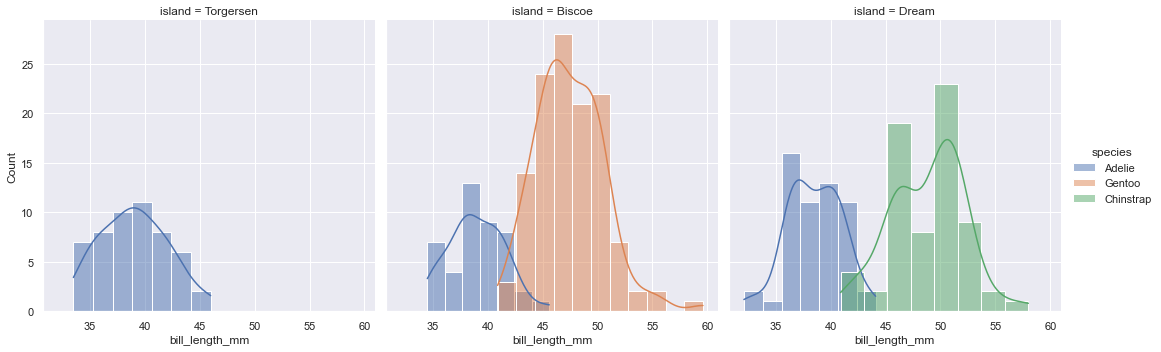

In [31]:
graph = sns.FacetGrid(df, col="island",  hue="species", height=5)
graph.map(sns.histplot, "bill_length_mm", kde=True).add_legend()
plt.show()

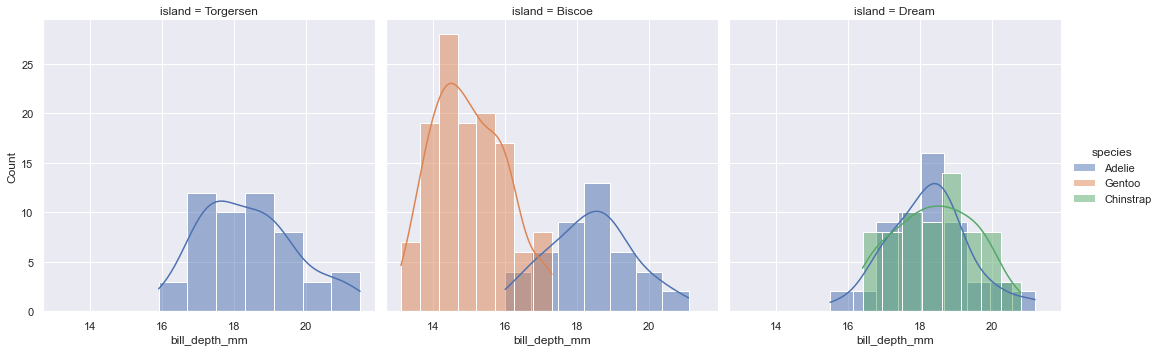

In [32]:
graph = sns.FacetGrid(df, col="island",  hue="species", height=5)
graph.map(sns.histplot, "bill_depth_mm", kde=True).add_legend()
plt.show()

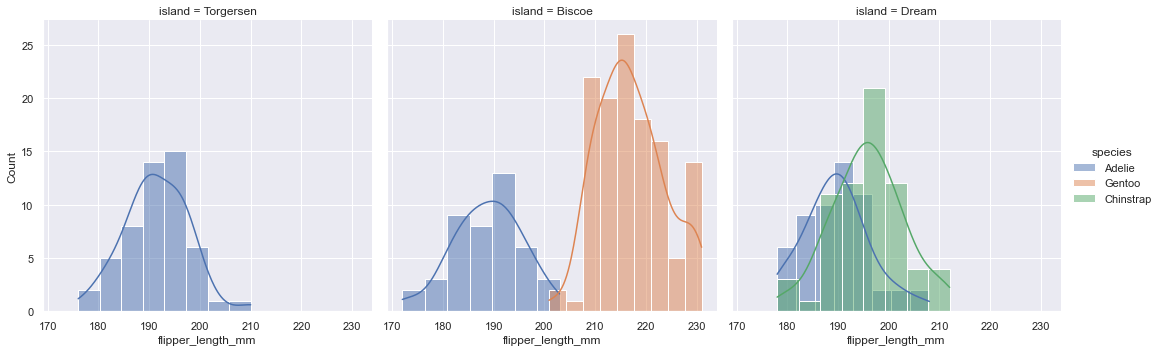

In [33]:
graph = sns.FacetGrid(df, col="island",  hue="species", height=5)
graph.map(sns.histplot, "flipper_length_mm", kde=True).add_legend()
plt.show()

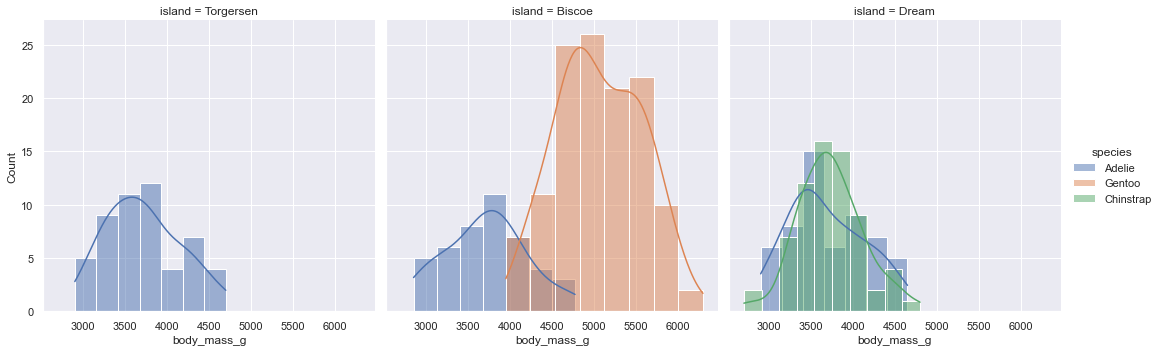

In [34]:
graph = sns.FacetGrid(df, col="island",  hue="species", height=5)
graph.map(sns.histplot, "body_mass_g", kde=True).add_legend()
plt.show()

** Numerical Columns HeatMap and ClusterMap **

Text(0.5, 1.0, 'df.corr()')

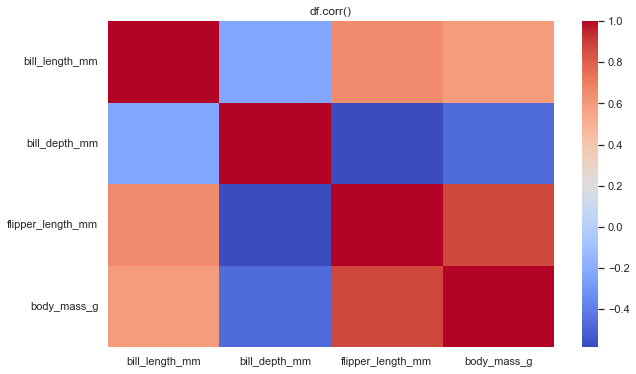

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.drop(['Unnamed: 0', 'year', 'latitude', 'longitude'], axis=1).corr(), cmap='coolwarm')
plt.title('df.corr()')

Text(0.5, 1.0, 'df.corr()')

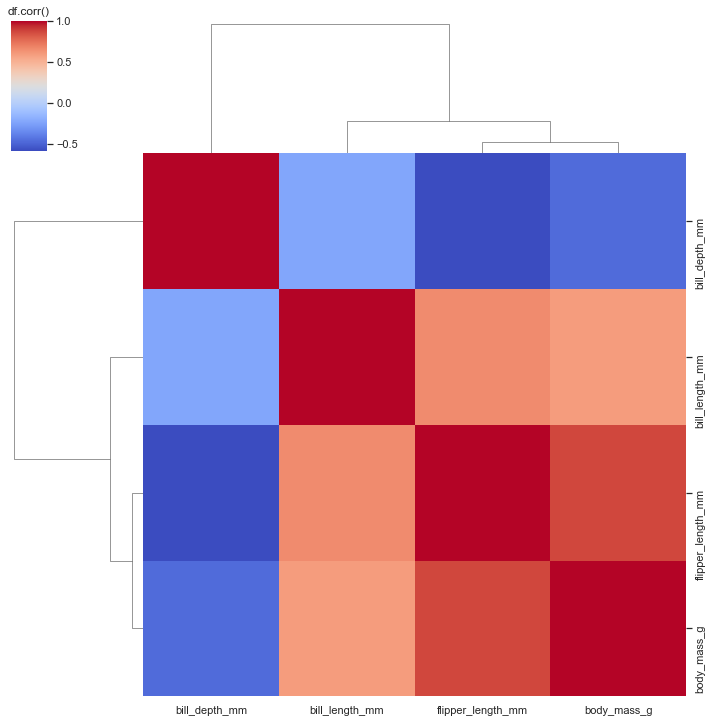

In [36]:
sns.clustermap(df.drop(['Unnamed: 0', 'year', 'latitude', 'longitude'], axis=1).corr(), cmap='coolwarm')
plt.title('df.corr()')